# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [61]:
# Load pickled data
import pickle
import csv
import pprint
import tensorflow as tf
import numpy as np

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/kanna/Downloads/traffic-signs-data/train.p'
testing_file = '/Users/kanna/Downloads/traffic-signs-data/test.p'
signnames_file = 'signnames.csv'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
with open(signnames_file, mode='r') as f:
    sign_dict = {}
    sign_reader = csv.reader(f, delimiter=',')
    for row in sign_reader:
        sign_dict[row[0]] = row[1]
    print(pprint.pformat(sign_dict))
    
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

{'0': 'Speed limit (20km/h)',
 '1': 'Speed limit (30km/h)',
 '10': 'No passing for vechiles over 3.5 metric tons',
 '11': 'Right-of-way at the next intersection',
 '12': 'Priority road',
 '13': 'Yield',
 '14': 'Stop',
 '15': 'No vechiles',
 '16': 'Vechiles over 3.5 metric tons prohibited',
 '17': 'No entry',
 '18': 'General caution',
 '19': 'Dangerous curve to the left',
 '2': 'Speed limit (50km/h)',
 '20': 'Dangerous curve to the right',
 '21': 'Double curve',
 '22': 'Bumpy road',
 '23': 'Slippery road',
 '24': 'Road narrows on the right',
 '25': 'Road work',
 '26': 'Traffic signals',
 '27': 'Pedestrians',
 '28': 'Children crossing',
 '29': 'Bicycles crossing',
 '3': 'Speed limit (60km/h)',
 '30': 'Beware of ice/snow',
 '31': 'Wild animals crossing',
 '32': 'End of all speed and passing limits',
 '33': 'Turn right ahead',
 '34': 'Turn left ahead',
 '35': 'Ahead only',
 '36': 'Go straight or right',
 '37': 'Go straight or left',
 '38': 'Keep right',
 '39': 'Keep left',
 '4': 'Speed lim

In [62]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = len(X_train)

# TODO: number of testing examples
n_test = len(X_test)

# TODO: what's the shape of an image?
image_shape = X_train.shape

# TODO: how many classes are in the dataset
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (39209, 32, 32, 3)
Number of classes = 43


[ 0  0  0 ..., 42 42 42]


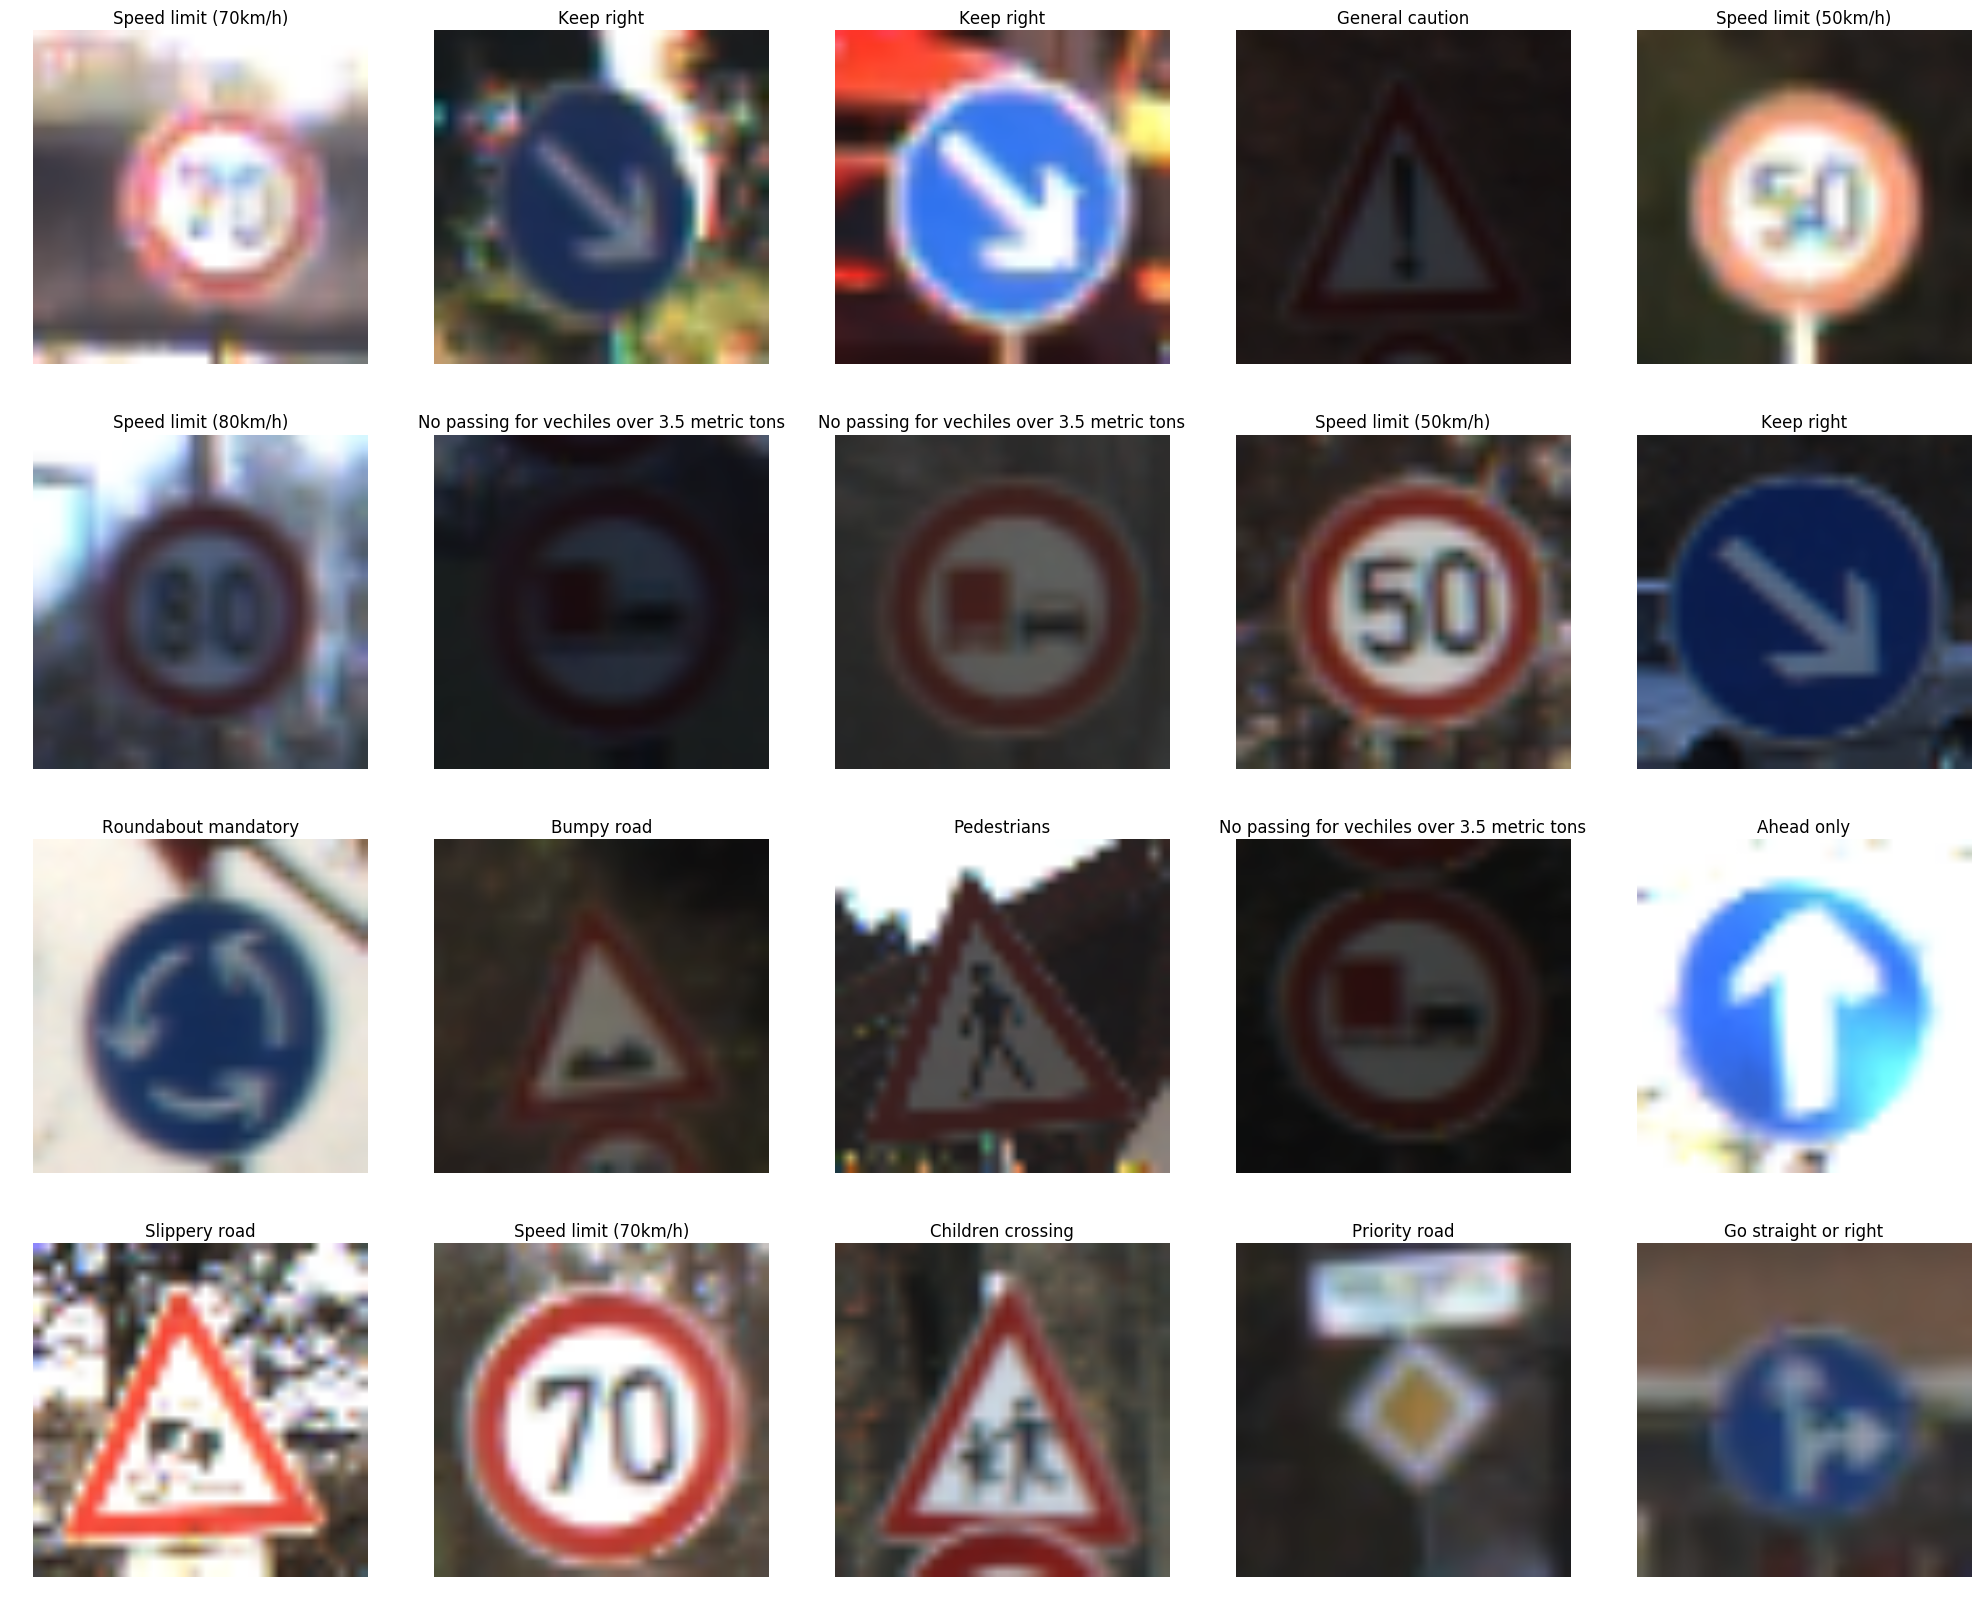

In [63]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
from matplotlib import pyplot as plt
import random

plt.figure(figsize=(25, 20))

for i in range(20):
    ind, image = random.choice(list(enumerate(X_train)))
    label_name = sign_dict[str(y_train[ind])]
    plt.subplot(4, 5, i+1)
    #plt.title(label_name)
    plt.imshow(image)
    plt.title(label_name)
    #print(y_train[ind])
    plt.axis('off')
print(y_train)
#plt.imshow(X_train[0])
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [64]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.preprocessing import LabelBinarizer

'''
# Convert color to grayscale
X_train = tf.image.rgb_to_grayscale(X_train, name=None)
X_test = tf.image.rgb_to_grayscale(X_test, name=None)
'''
# One Hot Encoding on the labels
encoder = LabelBinarizer()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

# Change to float32, so it can be multiplied against the features in TensorFlow, which are float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

In [65]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**

In [66]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Parameters
learning_rate = 0.001
batch_size = 128
training_epochs = 10
display_step = 1

n_input = 1024  # data input (Shape: 32*32)

n_hidden_layer = 256 # layer number of features

# Layer widths
layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
}


# Weights and biases
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [5, 5, 1, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_1'], layer_width['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [5, 5, layer_width['layer_2'], layer_width['layer_3']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [1024, layer_width['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
}
biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}


# create convolutional network
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    #W = tf.Variable(tf.zeros([3072,43]))
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


# MaxPool
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')


# Create model
def conv_net(x, weights, biases):
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2, k=2)

    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv2, k=2)

    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.relu(fc1)

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


'''
# Store layers weight & bias
weights = {
    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))
}
biases = {
    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
'''

"\n# Store layers weight & bias\nweights = {\n    'hidden_layer': tf.Variable(tf.random_normal([n_input, n_hidden_layer])),\n    'out': tf.Variable(tf.random_normal([n_hidden_layer, n_classes]))\n}\nbiases = {\n    'hidden_layer': tf.Variable(tf.random_normal([n_hidden_layer])),\n    'out': tf.Variable(tf.random_normal([n_classes]))\n}\n"

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [107]:
### Train your model here.
### Feel free to use as many code cells as needed.
'''
# Create a graph to hold the model.
graph = tf.Graph()


# Create model in the graph.
with graph.as_default():
    # Placeholders for inputs and labels.
    images_ph = tf.placeholder(tf.float32, [None, 32, 32, 3])
    labels_ph = tf.placeholder(tf.int32, [None])

    # Flatten input from: [None, height, width, channels]
    # To: [None, height * width * channels] == [None, 3072]
    images_flat = tf.contrib.layers.flatten(images_ph)

    # Fully conected layer. 
    # Generates logits of size [None, 43]
    #logits = tf.contrib.layers.fully_connected(images_flat, 43, tf.nn.relu)
    logits = conv_net(images_flat, weights, biases)

    # Convert logits to one-hot vector. Shape [None, 43], type float.
    predictions = tf.nn.softmax(logits)

    # Convert one-hot vector to label index (int). 
    # Shape [None], which is a 1D vector of length == batch_size.
    predicted_labels = tf.argmax(predictions, 1)

    # Define the loss function. 
    # Cross-entropy is a good choice for classification.
    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits, labels_ph))

    # Create training op.
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)

    # And, finally, an initizliation op to execute before training.
    init = tf.initialize_all_variables()

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predictions: ", predictions)
print("predicted_labels: ", predicted_labels)


# Create a session to run the graph we created.
session = tf.Session(graph=graph)

# First step is always to initalize our variables. 
# We don't care about the return value, though. It's None.
_ = session.run([init])


for i in range(20):
    _, loss_value = session.run([train, loss], 
                                feed_dict={images_ph: X_train, labels_ph: y_train})
    if i % 10 == 0:
        print("Loss: ", loss_value)
'''

# Create a graph to hold the model.
graph = tf.Graph()

# Create model in the graph.
with graph.as_default():
    # tf Graph input
    x = tf.placeholder("float", [None, 32, 32, 3])
    y = tf.placeholder("float", [None, n_classes])

    x_flat = tf.contrib.layers.flatten(x)

    #logits = conv_net(x, weights, biases)
    #logits = conv_net(x_flat, weights, biases)
    weights = tf.Variable(tf.zeros([3072,43]))
    biases = tf.Variable(tf.zeros([43]))
    #logits = conv_net(x_flat, weights, biases)
    logits = tf.matmul(x_flat, weights) + biases

    # Convert logits to one-hot vector. Shape [None, 43], type float.
    predictions = tf.nn.softmax(logits)

    # Convert one-hot vector to label index (int). 
    # Shape [None], which is a 1D vector of length == batch_size.
    predicted_labels = tf.argmax(predictions, 1)


    # Define loss and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
        .minimize(cost)

    # Initializing the variables
    init = tf.initialize_all_variables()

# Create a session to run the graph we created.
session = tf.Session(graph=graph)

# First step is always to initalize our variables. 
# We don't care about the return value, though. It's None.
_ = session.run([init])


'''
# Launch the graph
with tf.Session() as session:
    session.run(init)
    #session.run(optimizer, feed_dict={x: X_train, y: y_train})
'''
for i in range(400):
    _, loss_value = session.run([optimizer, cost], 
                            feed_dict={x: X_train, y: y_train})
    if i % 10 == 0:
        print("Loss: ", loss_value)


    # Training cycle
    '''
    for epoch in range(training_epochs):
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
        # Display logs per epoch step
        c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    '''
    


'''    # Test model
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(
        "Accuracy:",
        accuracy.eval({x: X_train, y: y_train}))'''

Loss:  3.76139
Loss:  7731.34
Loss:  6608.04
Loss:  4129.02
Loss:  2547.69
Loss:  3239.14
Loss:  1650.5
Loss:  1116.36
Loss:  850.516
Loss:  1194.94
Loss:  1479.15
Loss:  914.112
Loss:  827.003
Loss:  440.564
Loss:  367.564
Loss:  835.132
Loss:  673.798
Loss:  523.805
Loss:  604.64
Loss:  833.044
Loss:  299.178
Loss:  462.37
Loss:  257.9
Loss:  418.851
Loss:  200.914
Loss:  237.119
Loss:  117.805
Loss:  598.674
Loss:  165.934
Loss:  432.357
Loss:  195.474
Loss:  227.253
Loss:  204.491
Loss:  330.075
Loss:  214.174
Loss:  234.654
Loss:  466.428
Loss:  265.201
Loss:  107.94
Loss:  219.308


'    # Test model\n    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))\n    # Calculate accuracy\n    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))\n    print(\n        "Accuracy:",\n        accuracy.eval({x: X_train, y: y_train}))'

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [108]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [109]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

'''
# Convert logits to one-hot vector. Shape [None, 43], type float.
predictions = tf.nn.softmax(logits)

# Convert one-hot vector to label index (int). 
# Shape [None], which is a 1D vector of length == batch_size.
predicted_labels = tf.argmax(predictions, 1)

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
'''
# Pick 10 random images
sample_indexes = random.sample(range(len(X_test)), 10)
sample_images = [X_test[i] for i in sample_indexes]
sample_labels = [y_test[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = session.run([predicted_labels], 
                        feed_dict={x: sample_images})[0]
print(np.argmax(sample_labels, 1))
print(predicted)


[10  2 10  4  9  8 12  5 17  2]
[25  2 10 15  9  7 12  5 17  2]


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

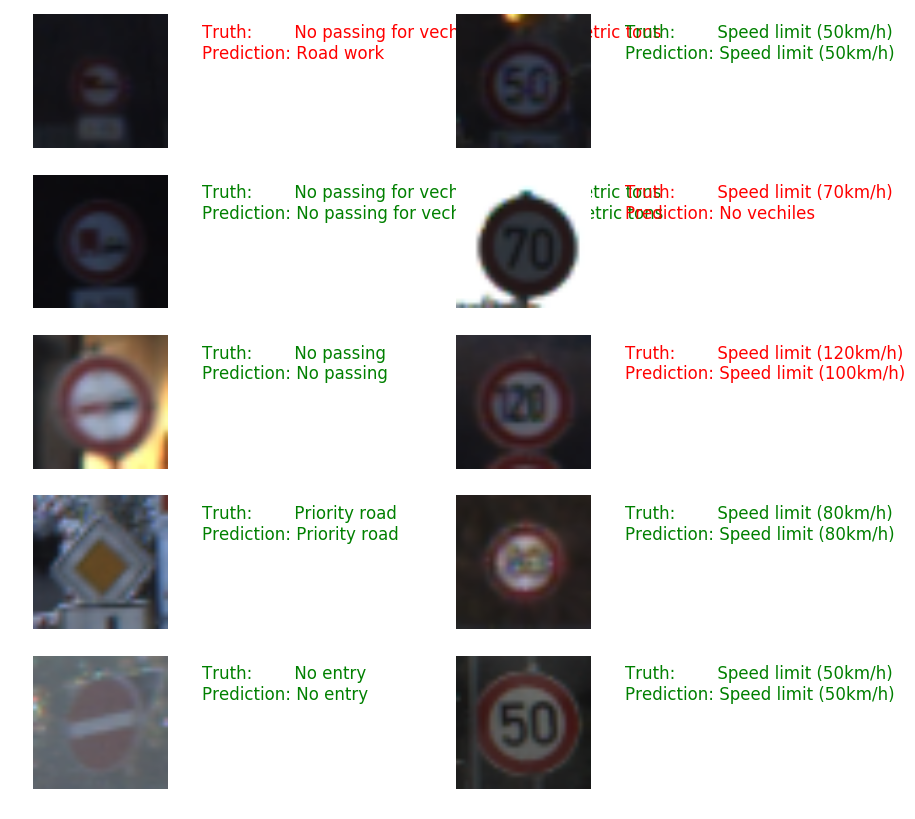

In [110]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sign_dict[str(np.argmax(sample_labels[i]))]
    prediction = sign_dict[str(predicted[i])]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [113]:
# Run predictions against the full test set.
predicted = session.run([predicted_labels], 
                        feed_dict={x: X_test})[0]
# Calculate how many matches we got.
match_count = sum([int(np.argmax(y) == y_) for y, y_ in zip(y_test, predicted)])
accuracy = match_count / len(y_test)
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.667
